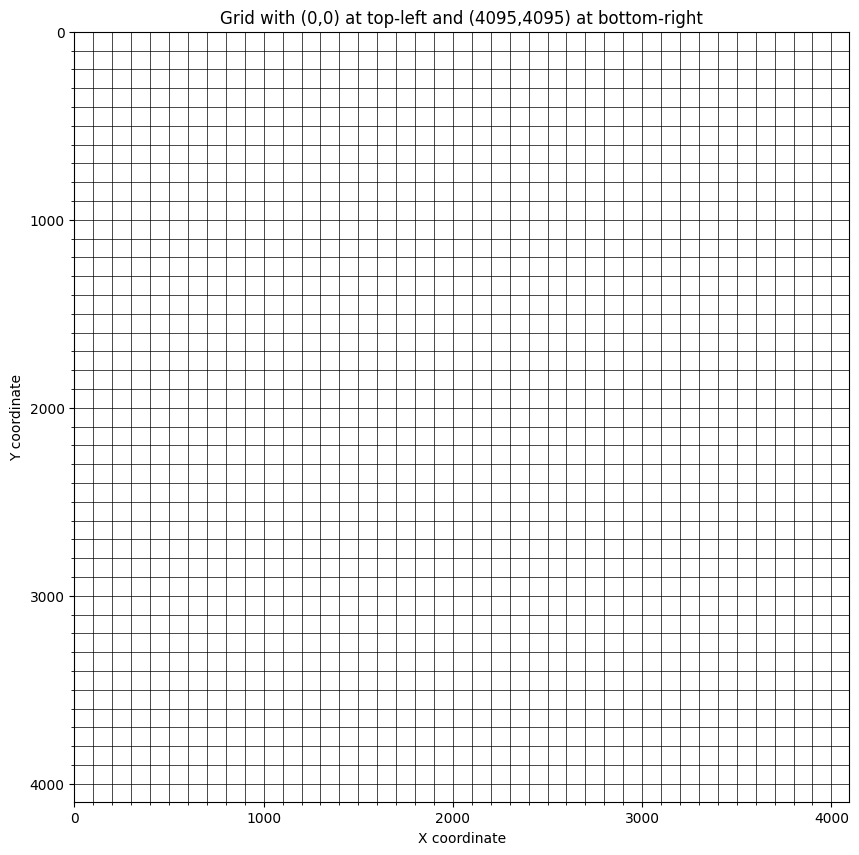

In [13]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 10), facecolor='white')

# Create the grid with each unit
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')

# Set the x and y limits
plt.xlim(0, 4095)
plt.ylim(0, 4095)

# Invert the y-axis to have (0,0) at the top-left
plt.gca().invert_yaxis()

# Set the major ticks at every 1000 units and minor ticks at every 100 units
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1000))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))

# Ensure the last possible value (4095) is shown
plt.xticks(range(0, 4096, 1000))
plt.yticks(range(0, 4096, 1000))

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Grid with (0,0) at top-left and (4095,4095) at bottom-right')

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Save the plot as an image
plt.savefig('./TFG_GRAPHICS/tomtom_grid.png', dpi=300, facecolor='white')

# Show the plot
plt.show()




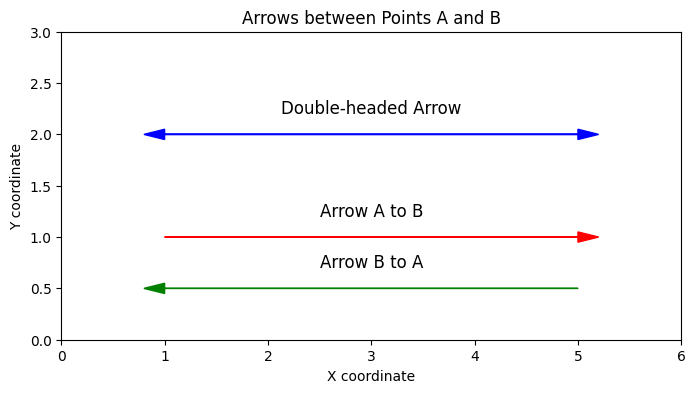

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define points A and B
A = np.array([1, 1])
B = np.array([5, 1])

# Calculate offsets for arrows
large_offset = np.array([0, 1.0])  # Larger vertical separation for the double-sided arrow
small_offset = np.array([0, 0.5])  # Smaller vertical separation for the single arrows

# Create the plot
plt.figure(figsize=(8, 4), facecolor='white')
plt.xlim(0, 6)
plt.ylim(0, 3)

# Draw double-headed arrow (two arrows in opposite directions)
plt.arrow(A[0], A[1] + large_offset[1], B[0] - A[0], B[1] - A[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
plt.arrow(B[0], B[1] + large_offset[1], A[0] - B[0], A[1] - B[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
plt.text((A[0] + B[0]) / 2, A[1] + large_offset[1] + 0.2, 'Double-headed Arrow', fontsize=12, ha='center')

# Draw arrow from A to B below the double-headed arrow
plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1], head_width=0.1, head_length=0.2, fc='red', ec='red')
plt.text((A[0] + B[0]) / 2, A[1] + 0.2, 'Arrow A to B', fontsize=12, ha='center')

# Draw arrow from B to A below the previous arrow
plt.arrow(B[0], B[1] - small_offset[1], A[0] - B[0], A[1] - B[1], head_width=0.1, head_length=0.2, fc='green', ec='green')
plt.text((A[0] + B[0]) / 2, B[1] - small_offset[1] + 0.2, 'Arrow B to A', fontsize=12, ha='center')

# Mark points A and B
# plt.text(A[0], A[1] - 0.2, 'A', fontsize=12, ha='center')

# plt.text(B[0], B[1] - 0.2, 'B', fontsize=12, ha='center')

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Arrows between Points A and B')

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Save the plot as an image
plt.savefig('./TFG_GRAPHICS/arrows_plot.png', dpi=300, facecolor='white')

# Show the plot
plt.show()


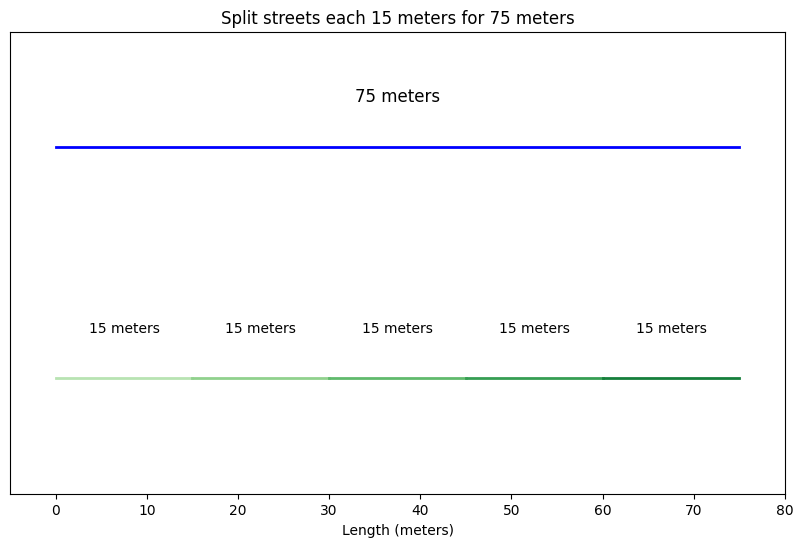

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.xlim(-5, 80)
plt.ylim(-0.5, 1.5)

# Draw the main horizontal line from Y=0 to Y=75
plt.plot([0, 75], [1, 1], color='blue', lw=2)
plt.text(37.5, 1.2, '75 meters', fontsize=12, ha='center')

# Define colors for the gradient
colors = plt.cm.Greens(np.linspace(0.3, 0.8, 5))

# Draw the split line below the main line with color gradient
for i in range(5):
    plt.plot([i * 15, (i + 1) * 15], [0, 0], color=colors[i], lw=2)
    plt.text(i * 15 + 7.5, 0.2, '15 meters', fontsize=10, ha='center')

# Add labels and title
plt.xlabel('Length (meters)')
plt.title('Split streets each 15 meters for 75 meters')

# Remove y-ticks for clarity
plt.gca().set_yticks([])

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Save the plot as an image
plt.savefig('./TFG_GRAPHICS/split_lines_15_meters.png', dpi=300, facecolor='white')

# Show the plot
plt.show()


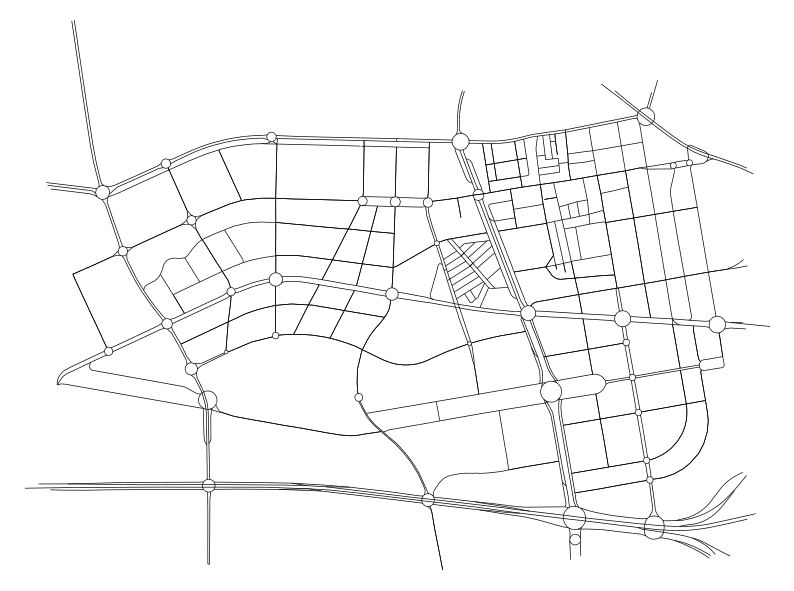

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [1]:
import osmnx as ox

G = ox.load_graphml('./graph_output/base_graph.graphml')

ox.add_edge_speeds(G)
ox.distance.add_edge_lengths(G)

# Plot the graph
ox.plot_graph(G, figsize=(10,10), edge_color='black', node_color='blue', bgcolor='white', edge_linewidth=0.5, node_size=0, save=True, filepath='./TFG_GRAPHICS/malaga_graph.png')


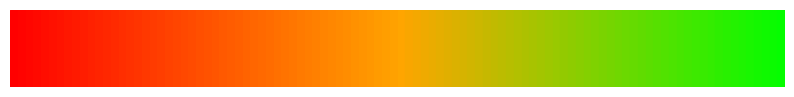

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def float_to_hex_color(value, dashboard_output=False, min_val=0, max_val=1):
    """
    Convert a float between 0 and 1 to a hex color representing traffic flow density.
    0 = Red (worst case)
    0.5 = Orange (moderate case)
    1 = Green (best case)
    """

    # Normalize the value to the range [0, 1]
    if max_val != min_val:  # Prevent division by zero
        value = (value - min_val) / (max_val - min_val)
    else:
        value = 0  # If min_val equals max_val, set value to 0

    # Clamp the value to the range [0, 1]
    value = max(0, min(1, value))

    # Define the RGB values for red, orange, and green
    red = (255, 0, 0)
    orange = (255, 165, 0)
    green = (0, 255, 0)

    if value < 0.5:
        # Interpolate between red and orange
        ratio = value / 0.5
        r = int(red[0] + ratio * (orange[0] - red[0]))
        g = int(red[1] + ratio * (orange[1] - red[1]))
        b = int(red[2] + ratio * (orange[2] - red[2]))
    else:
        # Interpolate between orange and green
        ratio = (value - 0.5) / 0.5
        r = int(orange[0] + ratio * (green[0] - orange[0]))
        g = int(orange[1] + ratio * (green[1] - orange[1]))
        b = int(orange[2] + ratio * (green[2] - orange[2]))

    # Convert the RGB values to a hex string
    if dashboard_output:
        hex_color = f'{r:02X}{g:02X}{b:02X}'
    else:
        hex_color = f'#{r:02X}{g:02X}{b:02X}'
    return hex_color

# Create gradient colors
gradient_colors = [float_to_hex_color(i / 100) for i in range(101)]

# Plot rectangle with gradient colors
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(gradient_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Remove axes for clarity
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.axis('off')

# Save the plot as an image
plt.savefig('./TFG_GRAPHICS/gradient_rectangle.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

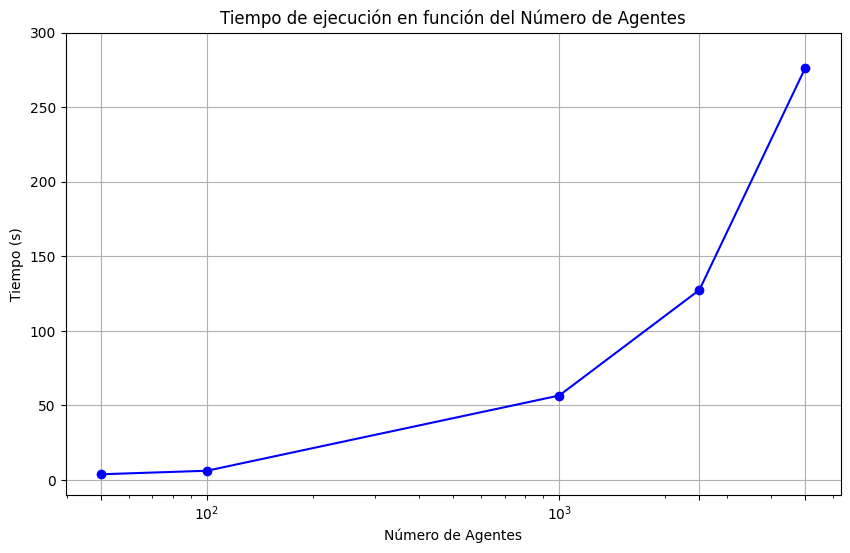

In [12]:
import matplotlib.pyplot as plt

# Datos
n_agentes = [50, 100, 1000, 2500, 5000]
tiempo = [3.75, 6.13, 56.58, 127.39, 276.53]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_agentes, tiempo, marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.xlabel('Número de Agentes')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución en función del Número de Agentes')
plt.grid(True)
plt.xscale('log')  # Utilizar escala logarítmica en el eje x para mejor visualización
plt.yscale('linear')  # Escala lineal en el eje y
plt.xticks(n_agentes)  # Marcas del eje x para los puntos específicos
plt.yticks(range(0, 301, 50))  # Marcas del eje y en intervalos de 50 segundos

# Mostrar la gráfica
plt.show()


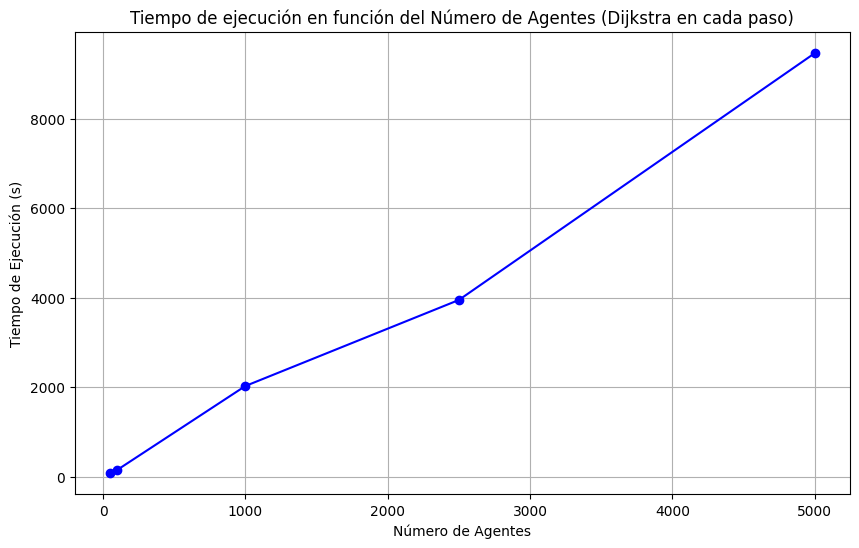

In [11]:
import matplotlib.pyplot as plt

# Datos
num_agentes = [50, 100, 1000, 2500, 5000]
tiempos = [75.72, 149.66, 2026.42, 3950.79, 9470.61]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(num_agentes, tiempos, marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Tiempo de ejecución en función del Número de Agentes (Dijkstra en cada paso)')
plt.xlabel('Número de Agentes')
plt.ylabel('Tiempo de Ejecución (s)')

# Añadir grid para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()


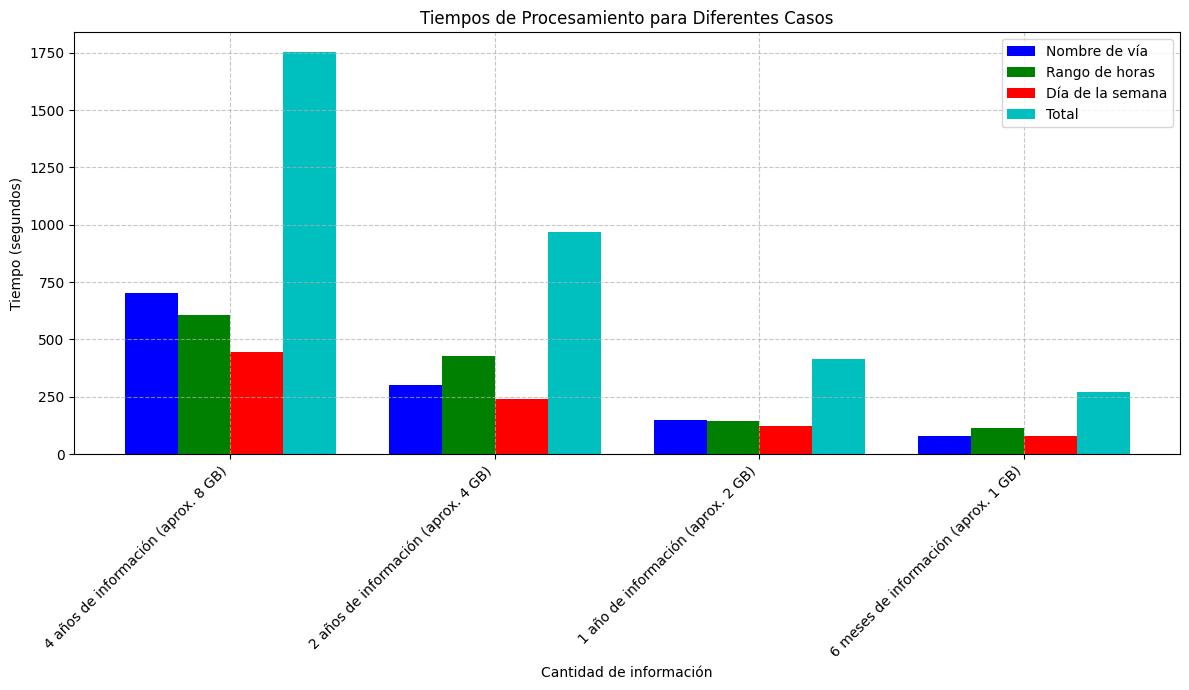

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
procesado_por = [
    "4 años de información (aprox. 8 GB)",
    "2 años de información (aprox. 4 GB)",
    "1 año de información (aprox. 2 GB)",
    "6 meses de información (aprox. 1 GB)"
]

tiempos = {
    "Nombre de vía": [701.30, 303.26, 147.94, 79.03],
    "Rango de horas": [606.53, 425.94, 142.88, 111.89],
    "Día de la semana": [443.38, 238.18, 122.84, 79.97],
    "Total": [1751.21, 967.38, 413.66, 270.89]
}

# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(12, 7))

# Posiciones de las barras en el eje x
x = np.arange(len(procesado_por))
width = 0.2  # Ancho de las barras

# Colores para cada tipo de tiempo
colors = ['b', 'g', 'r', 'c']

# Crear las barras para cada tipo de tiempo
for i, (label, times) in enumerate(tiempos.items()):
    ax.bar(x + i * width, times, width, label=label, color=colors[i])

# Etiquetas y título
ax.set_xlabel('Cantidad de información')
ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Tiempos de Procesamiento para Diferentes Casos')
ax.set_xticks(x + width * (len(tiempos) / 2 - 0.5))
ax.set_xticklabels(procesado_por, rotation=45, ha='right')
ax.legend()

# Añadir cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()
